## Guest Profile Analysis
 ***Explore data for insights about Guest***

In [424]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [425]:
# Load data from local storage into a pandas dataframe
htb = pd.read_csv(r"C:/Users/HP/Documents/Azeez/Hotel Booking Analysis/hotel_bookings_clean.csv")

In [426]:
# Set all columns to show
pd.set_option('display.max_columns', None)
# Preview data
htb.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date
0,Resort Hotel,0,342,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24
1,Resort Hotel,0,737,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24
2,Resort Hotel,0,7,0,1,1,0,0,Bed & Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No agent,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24
3,Resort Hotel,0,13,0,1,1,0,0,Bed & Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18
4,Resort Hotel,0,14,0,2,2,0,0,Bed & Breakfast,GBR,Online TA,Travel Agent/Tour Operator,0,0,0,A,A,0,No Deposit,240.0,Not provided,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17


In [427]:
htb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   stays_in_weekend_nights         87396 non-null  int64  
 4   stays_in_week_nights            87396 non-null  int64  
 5   adults                          87396 non-null  int64  
 6   children                        87396 non-null  int64  
 7   babies                          87396 non-null  int64  
 8   meal                            87396 non-null  object 
 9   country                         87396 non-null  object 
 10  market_segment                  87396 non-null  object 
 11  distribution_channel            87396 non-null  object 
 12  is_repeated_guest               

In [428]:
# Change datatype of columns 'reservation_status_date', 'arrival_date', 'booking_date' to datetime
htb['reservation_status_date'] = pd.to_datetime(htb['reservation_status_date'])
htb['arrival_date'] = pd.to_datetime(htb['arrival_date'])
htb['booking_date'] = pd.to_datetime(htb['booking_date'])

# Re-check datatypes
htb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   stays_in_weekend_nights         87396 non-null  int64         
 4   stays_in_week_nights            87396 non-null  int64         
 5   adults                          87396 non-null  int64         
 6   children                        87396 non-null  int64         
 7   babies                          87396 non-null  int64         
 8   meal                            87396 non-null  object        
 9   country                         87396 non-null  object        
 10  market_segment                  87396 non-null  object        
 11  di

***Q1: What is the total number of guest booked vs actual guest that arrived?***

In [429]:
# New column: Add up number of adults, children and babies
htb['total_guest'] = htb['adults'] + htb['children'] + htb['babies']

# Get total no of guest
booked_guest = htb['total_guest'].sum()

# Get no of guest that actually arrived
arrived_guest = htb[htb['reservation_status'] == 'Check-Out']['total_guest'].sum()

# Get percentage of guest that arrived
arrived_percent = (arrived_guest / booked_guest)*100

print(f'In total, there were {booked_guest:,.0f} guests booked for stay.\nHowever, only {arrived_percent:.2f}% ({arrived_guest:,.0f}) of them arrived.')

In total, there were 176,999 guests booked for stay.
However, only 70.75% (125,235) of them arrived.


***Q2: What is the average number of guests per booking?***

In [430]:
# Get average no. of guest and display
print(f'The average no of guest per booking is {round(htb['total_guest'].mean())}')

The average no of guest per booking is 2


***Q3: What proportion of guests are repeated vs. firsttime customers?***

In [431]:
# Get count of guest type and turn to proportion (i.e. % of total)
guest_type = (htb['is_repeated_guest']
                .value_counts(normalize=True)
                .rename({0: 'First-time', 1: 'Repeated'})   # replace binary with actual text
                .reset_index()
                .rename(columns={'is_repeated_guest': 'guest_type'}) # rename primary column
                )

# Xply proportion by 100 and round up to 2dp
guest_type['proportion'] = (guest_type['proportion']*100).round(2)
guest_type


,guest_type,proportion
0,First-time,96.09
1,Repeated,3.91


***Q4: Do repeated guests cancel less often than new ones?***

In [432]:
# Get percentage of each repeated type based on no. of cancellation
guest_cancel = (htb.groupby('is_repeated_guest')
                ['is_canceled'].mean()  # use mean since column is a binary(i.e 1 and 0)
                .rename({0: 'First-time', 1: 'Repeated'})  # replace binary with actual text
                .reset_index(name='cancel_rate%') # reset index and rename value column
                .rename(columns={'is_repeated_guest': 'guest_type'}) # rename primary column
                )

# Xply cancel_rate by 100 and round up to 2dp
guest_cancel['cancel_rate%'] = (guest_cancel['cancel_rate%']*100).round(2)
guest_cancel

,guest_type,cancel_rate%
0,First-time,28.30
1,Repeated,7.64


***Q5: Which customer type are most likely to cancel their bookings?***

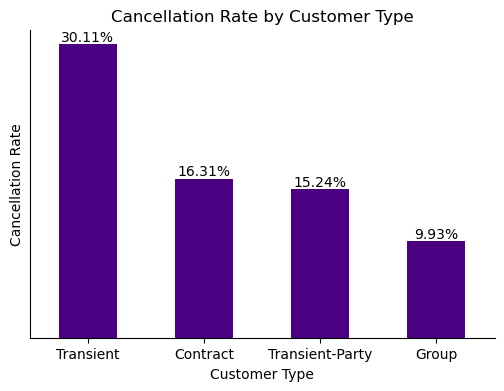

In [433]:
# Get percentage of each customer type based on no. of cancellation
customer_cancel = (htb.groupby('customer_type')
                   ['is_canceled'].mean() # use mean since column is a binary(i.e 1 and 0)
                   .sort_values(ascending=False) # sort values from largest to smallest
                   .reset_index(name='cancel_rate%') # reset index and rename value column
                   )
                
# Xply cancel_rate by 100 and round up to 2dp
customer_cancel['cancel_rate%'] = (customer_cancel['cancel_rate%']*100).round(2)

# Plot a bar chart
bar = customer_cancel.plot(kind='bar', x='customer_type', y='cancel_rate%', color='indigo', legend=False, figsize=(6,4))

# Add bar label
plt.bar_label(bar.containers[0], fmt='{}%')

# Plot styling
plt.xlabel('Customer Type')
plt.xticks(rotation=0)
plt.yticks([])
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Customer Type')
sns.despine()

plt.show()


***Q6: Which meal plan is most prefered overall?***

In [434]:
popular_meal = htb.groupby('meal').size().nlargest(1).reset_index(name='no')
print(f'The {popular_meal['meal'][0]} meal plan')

The Bed & Breakfast meal plan


***Q7: Does meal plan preference differ between City and Resort hotels?***

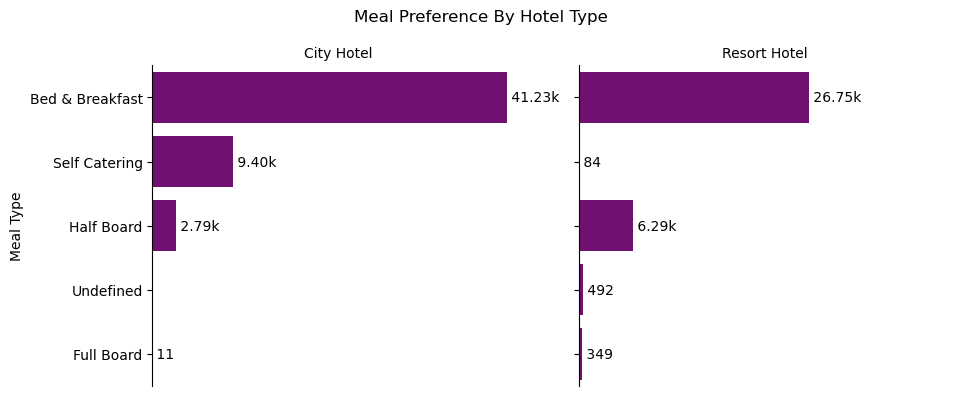

In [435]:
# Get no. of meal type by each hotel
hotel_meal = (htb.groupby(['hotel', 'meal'])
              .size()
              .sort_values(ascending=False)
              .reset_index(name='count')
              .fillna(0)
              )

# Plot a horizontal bar chart by Hotel type
ax = sns.catplot(data=hotel_meal, kind='bar', y='meal', x='count', col='hotel', orient='h', height=4, aspect=1.2, color='purple')

# Loop through each subplot (Axes)
for a in ax.axes.flat:
    # Add bar labels
    for bars in a.containers:
        a.bar_label(bars, labels=[f' {val/1000:,.2f}k' if val >= 1000 else f' {val:.0f}' for val in bars.datavalues])

# Plot Styling
ax.set_titles("{col_name}") # set subplot titles to the value used to split
ax.set_xlabels('')
ax.set_ylabels('Meal Type')
plt.suptitle('Meal Preference By Hotel Type')
plt.gca().xaxis.set_ticks([])
plt.tight_layout()
sns.despine(bottom=True)

plt.show()

***Q7: Among the top 10 countries by number of bookings, how does ADR and average length of stay compare?***

In [436]:
# Get top 10 countries with highest bookings
top10 = htb['country'].value_counts().nlargest(10).index.to_list()
top10

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

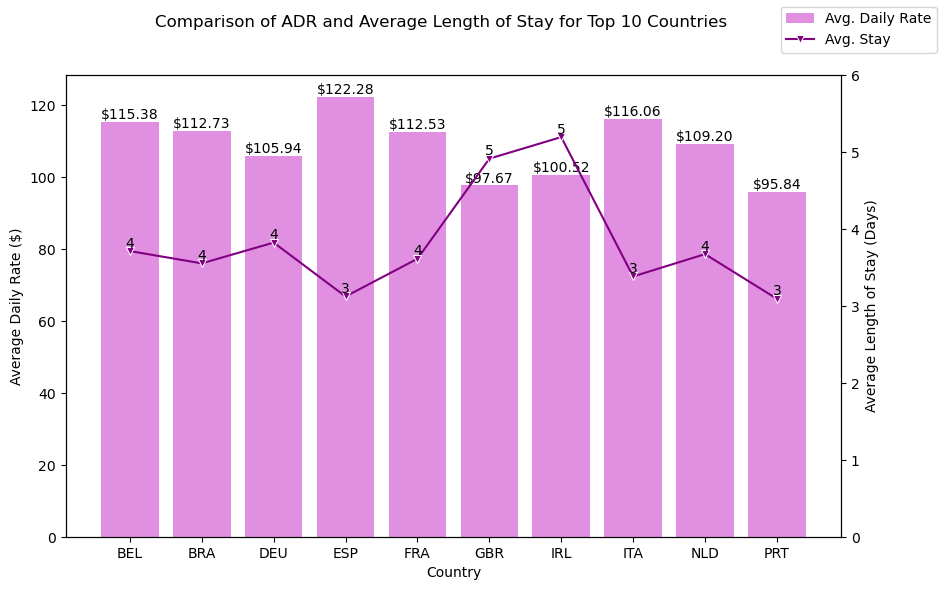

In [ ]:
# Filter 'htb' for only top10 country's data and copy to a new dataframe
top10_htb = htb[htb['country'].isin(top10)].copy()

# Create a new column for total length of stay
top10_htb['total_stay'] = top10_htb['stays_in_weekend_nights'] + top10_htb['stays_in_week_nights']

# Get adr and avg length of stay for top 10 countries
top10_metric = top10_htb.groupby('country')[['avg_daily_rate', 'total_stay']].mean().rename(columns={'total_stay': 'avg_stay'}).round(2)

# Set plot axis and plot size
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot bar chat on the subplot
top_bar = sns.barplot(data=top10_metric, x='country', y='avg_daily_rate', color='violet', ax=ax1, label='Avg. Daily Rate', legend=False)
ax1.set_ylabel('Average Daily Rate ($)') # Add y-axis label
ax1.bar_label(top_bar.containers[0], fmt='${:.2f}') # Add bar labels
ax1.set_xlabel('Country')   # Add x-axis label

# Use right side of first plot as Secondary axis for second plot
ax2 = ax1.twinx()
sns.lineplot(data=top10_metric, x='country', y='avg_stay', color='purple', marker='v', ax=ax2, label='Avg. Stay', legend=False)
ax2.set_ylabel('Average Length of Stay (Days)')
ax2.set_ylim(0, 6)

# Loop through each point
for i, y in enumerate(top10_metric['avg_stay']):
    plt.text(i, y +0.05, s=f'{round(y)}', ha='center')  # Add data labels

# Plot styling
fig.legend()
fig.suptitle('Comparison of ADR and Average Length of Stay for Top 10 Countries')

plt.show()

***Q8: Are there specific countries with higher cancellation or longer lead times?***

In [438]:
# Get cancel_rate, avg lead time, and total bookings per country
country_summary = (htb.groupby('country')
                   .agg(cancel_rate=('is_canceled', 'mean'), 
                        avg_lead_time=('lead_time', 'mean'),
                        total_bookings=('country', 'size'))
                    .reset_index()
                    )

country_summary['cancel_rate'] = (country_summary['cancel_rate']*100).round(2)  # xply cancel rate by 100 and round to 2dp
country_summary['avg_lead_time'] = country_summary['avg_lead_time'].round(2) # round up to 2dp

country_summary.head()

,country,cancel_rate,avg_lead_time,total_bookings
0,ABW,0.00,126.00,2
1,AGO,56.43,23.90,342
2,AIA,0.00,0.00,1
3,ALB,18.18,93.27,11
4,AND,71.43,47.00,7


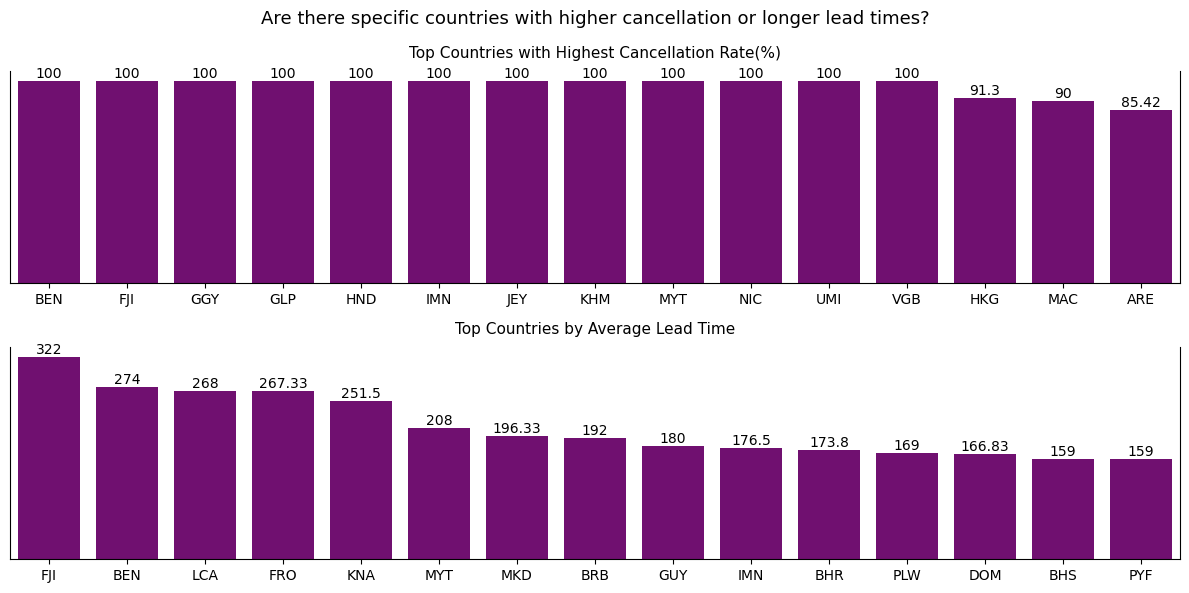

In [439]:
# Set no. of subplots and plot size
fig, ax = plt.subplots(2,1, figsize=(12,6))

# Plot bar chart on axis ax[0]
bar1 = sns.barplot(data=country_summary.nlargest(15, 'cancel_rate'), 
                   ax=ax[0], 
                   x='country', y='cancel_rate', 
                   color='purple')
# Plot styling
ax[0].bar_label(bar1.containers[0]) # add bar labels
ax[0].set_title('Top Countries with Highest Cancellation Rate(%)', y=1.02, size=11) # set plot title
ax[0].set_yticks([])    # remove yaxis ticks
ax[0].set_ylabel('')    # remove yaxis label
ax[0].set_xlabel('')    # remove xaxis label

# Plot second bar chart on axis ax[1]
bar2 = sns.barplot(data=country_summary.nlargest(15, 'avg_lead_time'), 
                   ax=ax[1], 
                   x='country', y='avg_lead_time', 
                   color='purple')
# Plot styling
ax[1].bar_label(bar2.containers[0]) # add bar labels
ax[1].set_title('Top Countries by Average Lead Time', y=1.02, size=11) # set plot title
ax[1].set_yticks([])    # remove yaxis ticks
ax[1].set_ylabel('')    # remove yaxis label
ax[1].set_xlabel('')    # remove xaxis label

sns.despine(right=False) # remove chart borderline
fig.suptitle('Are there specific countries with higher cancellation or longer lead times?', size=13) # set figure title
plt.tight_layout()  # auto adjust plot and properties

plt.show()

***Q9: Are longer stays more common for certain customer types or countries?***

*Note: For stays, we only consider Guest that actually arrived and checked-out, excluding canceled or No-Show bookings*<br>

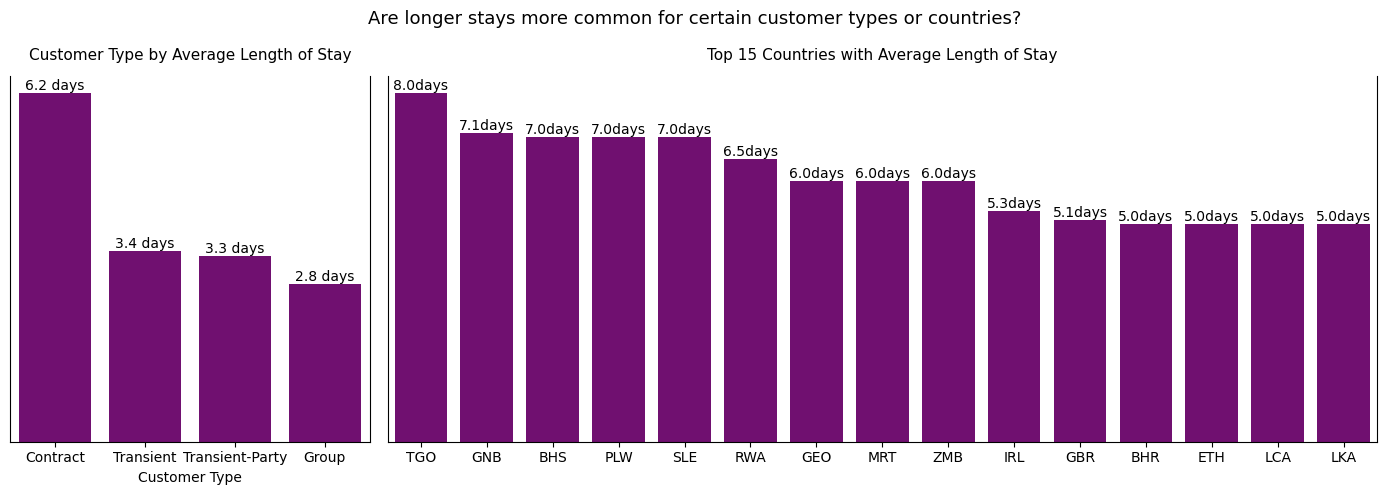

In [440]:
# Filter data for only bookings that checked-out
check_outs = htb[htb['reservation_status']=='Check-Out'].copy()

# New column: get total no of stay
check_outs['total_stay'] = check_outs['stays_in_weekend_nights'] + check_outs['stays_in_week_nights']

# Get Average Stay Days per Customer Type
customer_avg_stay = check_outs.groupby('customer_type')['total_stay'].mean().sort_values(ascending=False).round(1).reset_index()

# Get Average Stay Days per Country
country_avg_stay = check_outs.groupby('country')['total_stay'].mean().nlargest(15).sort_values(ascending=False).round(1).reset_index()

# Set no. of subplots, plot size, and width ratio of chart
fig, ax = plt.subplots(1,2, figsize=(14,5), gridspec_kw={'width_ratios': [0.8, 2.2]})

# Plot bar chart on axis
cust_bar = sns.barplot(data=customer_avg_stay, ax=ax[0], x='customer_type', y='total_stay', color='purple')
ax[0].bar_label(cust_bar.containers[0], fmt='{:.1f} days') # add bar labels
ax[0].set_title('Customer Type by Average Length of Stay', y=1.02, size=11) # set plot title
ax[0].set_yticks([])    # remove yaxis ticks
ax[0].set_ylabel('')    # remove yaxis label
ax[0].set_xlabel('Customer Type')    # rename xaxis label

# Plot second bar chart on another axis
ctry_bar = sns.barplot(data=country_avg_stay, ax=ax[1], x='country', y='total_stay', color='purple')
ax[1].bar_label(ctry_bar.containers[0], fmt='{:.1f}days') # add bar labels
ax[1].set_title('Top 15 Countries with Average Length of Stay', y=1.02, size=11) # set plot title
ax[1].set_yticks([])    # remove yaxis ticks
ax[1].set_ylabel('')    # remove yaxis label
ax[1].set_xlabel('')    # rename xaxis label

sns.despine(right=False) # remove chart borderline
fig.suptitle('Are longer stays more common for certain customer types or countries?', size=13) # set figure title
plt.tight_layout()  # auto adjust plot and properties

plt.show()

*For more context, rather than getting only average length of stay, we can also look at the total number of stay days*

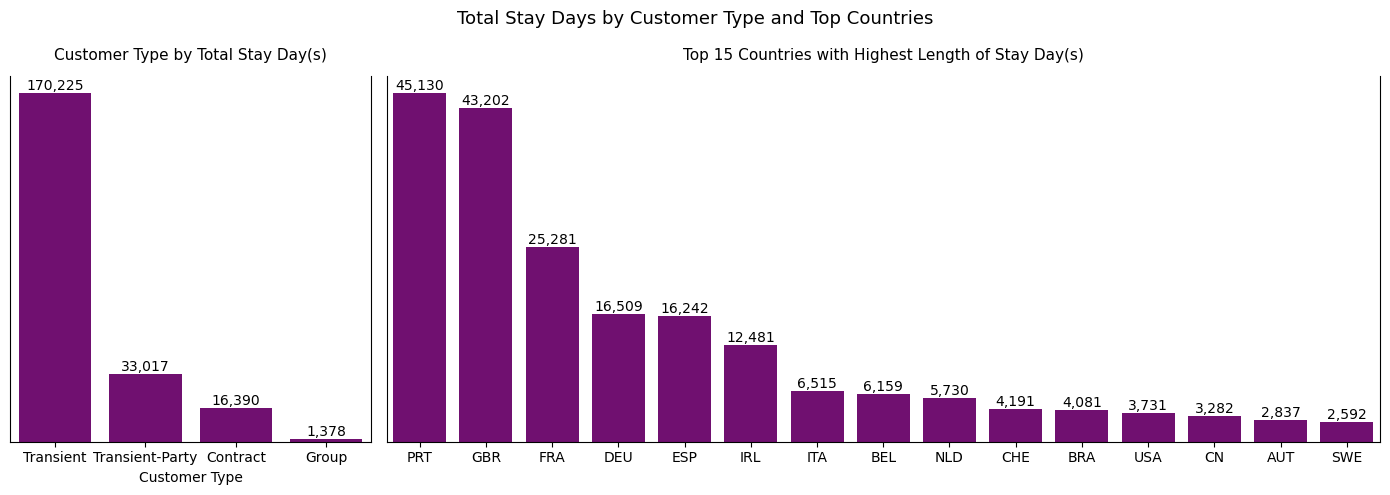

In [441]:
# Get Total no. of Stay Days per Customer Type
customer_stay = check_outs.groupby('customer_type')['total_stay'].sum().sort_values(ascending=False).round(1).reset_index()

# Get Total no. of Stay Days per Country
country_stay = check_outs.groupby('country')['total_stay'].sum().nlargest(15).sort_values(ascending=False).round(1).reset_index()

# Set no. of subplots, plot size, and width ratio of chart
fig, ax = plt.subplots(1,2, figsize=(14,5), gridspec_kw={'width_ratios': [0.8, 2.2]})

# Plot bar chart on axis ax[0]
cust_barr = sns.barplot(data=customer_stay, ax=ax[0], x='customer_type', y='total_stay', color='purple')
ax[0].bar_label(cust_barr.containers[0], fmt='{:,.0f}') # add bar labels
ax[0].set_title('Customer Type by Total Stay Day(s)', y=1.02, size=11) # set plot title
ax[0].set_yticks([])    # remove yaxis ticks
ax[0].set_ylabel('')    # remove yaxis label
ax[0].set_xlabel('Customer Type')    # rename xaxis label

# Plot second bar chart on axis ax[1]
ctry_bar = sns.barplot(data=country_stay, ax=ax[1], x='country', y='total_stay', color='purple')
ax[1].bar_label(ctry_bar.containers[0], fmt='{:,.0f}') # add bar labels
ax[1].set_title('Top 15 Countries with Highest Length of Stay Day(s)', y=1.02, size=11) # set plot title
ax[1].set_yticks([])    # remove yaxis ticks
ax[1].set_ylabel('')    # remove yaxis label
ax[1].set_xlabel('')    # rename xaxis label

sns.despine(right=False) # remove chart borderline
fig.suptitle('Total Stay Days by Customer Type and Top Countries', size=13) # set figure title
plt.tight_layout()  # auto adjust plot and properties

plt.show()

***Q10: What are the deposit preferences or behaviors of guests?***

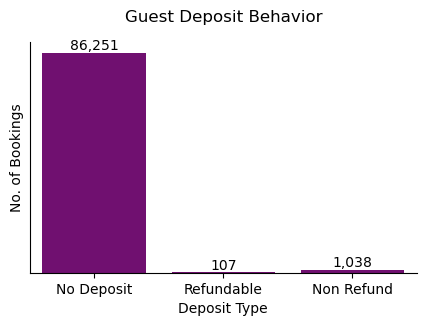

In [442]:
# Set plot size
plt.figure(figsize=(5,3))

# Plot bar chart with .countplot()
depo_bar = sns.countplot(data=htb, x='deposit_type', color='purple')
plt.bar_label(depo_bar.containers[0], fmt='{:,.0f}') # add bar labels

# Plot styling
plt.xlabel('Deposit Type')
plt.ylabel('No. of Bookings')
plt.yticks([])
plt.title('Guest Deposit Behavior', y=1.05)
sns.despine()

plt.show()

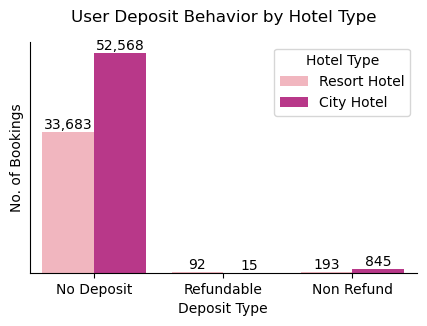

In [443]:
# Set plot size
plt.figure(figsize=(5,3))

# Plot bar chart with .countplot()
hotel_dpst = sns.countplot(data=htb, x='deposit_type', hue='hotel', palette='RdPu')

# Loop through bar and add label
for bar in hotel_dpst.containers:
    plt.bar_label(bar, fmt='{:,.0f}')

# Plot Styling
plt.xlabel('Deposit Type')
plt.ylabel('No. of Bookings')
plt.yticks([])
plt.legend(title='Hotel Type')
plt.title('User Deposit Behavior by Hotel Type', y=1.05)
sns.despine()

plt.show()

***Q11: How does deposit type influence cancellation rates?***

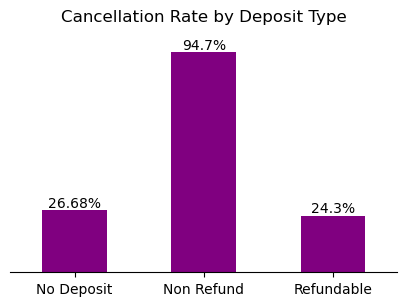

In [444]:
# Set plot size
plt.figure(figsize=(5,3))

# Get cancellation rate by deposit type
dpt_cancel = (htb.groupby('deposit_type')['is_canceled']
              .mean()
              .mul(100) # Xply by 100
              .round(2) # round up to 2dp
              .plot(kind='bar', color='purple') # plot bar chart
              )

# Add bar labels
plt.bar_label(dpt_cancel.containers[0], fmt='{}%')

# Plot styling
plt.xticks(rotation=0)
plt.xlabel('')
plt.yticks([])
plt.title('Cancellation Rate by Deposit Type', y=1.05)
sns.despine(left=True)

plt.show()